In [3]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import mplcyberpunk
from torch import nn
from torchmetrics import Accuracy
import torch
import numpy as np

plt.style.use('cyberpunk')

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [5]:
X, y = make_blobs(1000, n_features=2, random_state=42, centers=4, cluster_std=1.5)

X[:5], y[:10]

(array([[-8.41339595,  6.93516545],
        [-5.76648413, -6.43117072],
        [-6.04213682, -6.76610151],
        [ 3.95083749,  0.69840313],
        [ 4.25049181, -0.28154475]]),
 array([3, 2, 2, 1, 1, 2, 1, 2, 2, 1]))

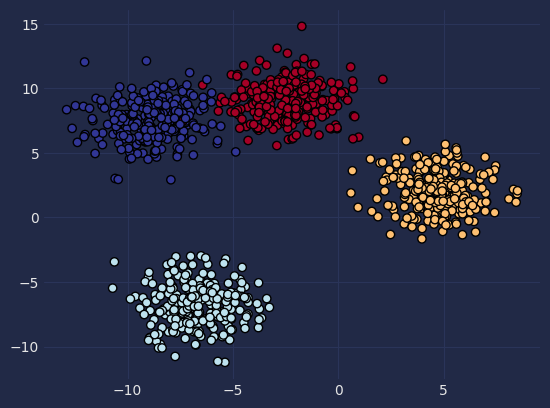

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors="k")

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train = torch.from_numpy(X_train).type(torch.float32).to(device)
X_test = torch.from_numpy(X_test).type(torch.float32).to(device)
y_train = torch.from_numpy(y_train).type(torch.LongTensor).to(device)
y_test = torch.from_numpy(y_test).type(torch.LongTensor).to(device)

In [8]:
class MClassificaitonModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_1 = nn.Linear(2, 10)
        self.linear_2 = nn.Linear(10, 5)
        self.linear_3 = nn.Linear(5, 4)

    # returns logits
    def forward(self, x):
        return self.linear_3(self.linear_2(self.linear_1(x)))

In [9]:
model_0 = MClassificaitonModel()

In [11]:
# build the training loop
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.01)
loss_fn = torch.nn.CrossEntropyLoss()
accuracy_fn = Accuracy(task="multiclass", num_classes=4)
from utils.boundaries import plot_decision_boundary

epochs = 100


for epoch in range(epochs):
    
    # training loop
    model_0.train()
    y_logits = model_0(X_train)
    y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1)

    # y_preds = torch.softmax(y_logits, dim=1)
    loss = loss_fn(y_logits, y_train)
    accu = accuracy_fn(y_preds, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # testing loop
    model_0.eval()

    with torch.inference_mode():
        y_logits_test = model_0(X_test)
        y_preds_test = torch.softmax(y_logits_test, dim=1).argmax(dim=1)
        loss_test = loss_fn(y_logits_test, y_test)
        acc_test = accuracy_fn(y_preds_test, y_test)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch}, loss: {loss:0.4f}, accu: {accu * 100:0.2f}% | test_loss: {loss_test:0.4f}, test_acc: {acc_test * 100:0.2f}%")

Epoch: 0, loss: 0.0331, accu: 99.20% | test_loss: 0.0298, test_acc: 99.20%
Epoch: 10, loss: 0.0256, accu: 99.20% | test_loss: 0.0217, test_acc: 99.20%
Epoch: 20, loss: 0.0239, accu: 99.33% | test_loss: 0.0205, test_acc: 99.20%
Epoch: 30, loss: 0.0228, accu: 99.33% | test_loss: 0.0163, test_acc: 99.20%
Epoch: 40, loss: 0.0220, accu: 99.33% | test_loss: 0.0147, test_acc: 99.20%
Epoch: 50, loss: 0.0213, accu: 99.47% | test_loss: 0.0151, test_acc: 99.20%
Epoch: 60, loss: 0.0206, accu: 99.47% | test_loss: 0.0134, test_acc: 99.20%
Epoch: 70, loss: 0.0201, accu: 99.47% | test_loss: 0.0130, test_acc: 99.20%
Epoch: 80, loss: 0.0195, accu: 99.47% | test_loss: 0.0120, test_acc: 99.20%
Epoch: 90, loss: 0.0191, accu: 99.47% | test_loss: 0.0113, test_acc: 99.20%
